# Investigate reaction time for lift

In [1]:
import numpy as np
import h5py

import matplotlib.pyplot as plt

# rb50/20250125 

In [2]:
f = h5py.File("/home/clewis/wasabi/reaganbullins2/ProjectionProject/rb50/20250125/MAT_FILES/rb50_20250125_datastruct_pt3.mat", 'r')
data = f['data']
print(data.keys())

<KeysViewHDF5 ['aligned_cue_rec_time', 'aligned_laser_rec_time', 'any', 'chan_spk', 'cue', 'cue_rec_time', 'cue_trial_time', 'depth_spk', 'field_id', 'field_size', 'full_field', 'grab', 'grab_ms', 'laser', 'laser_rec_time', 'laser_trial_time', 'lift', 'lift_ms', 'lift_rec_time', 'mouth', 'mouth_ms', 'no_success', 'pattern_fill', 'pattern_id', 'pattern_xy', 'plift', 'plift_ms', 'single', 'spikes_raw_cue', 'spikes_raw_cue_extended', 'spikes_raw_laser', 'spikes_raw_lift', 'totTime', 'trial_start']>


In [3]:
stim_idxs = np.where(data["pattern_id"][:] > 2)[1]
control_idxs = np.where(data["pattern_id"][:] == 0)[1]
single_reach_idxs = np.where(data["single"][:, 0] == 1)
stim_idxs = np.concatenate([stim_idxs, control_idxs])
stim_idxs

array([ 16,  18,  20,  22,  23,  24,  29,  31,  32,  34,  37,  38,  40,
        42,  43,  46,  47,  48,  52,  55,  56,  60,  61,  62,  64,  67,
        68,  70,  71,  73,  76,  77,  78,  82,  83,  86,  89,  90,  92,
        94,  97,  98, 101, 103, 104, 106, 107, 108, 113, 114, 116, 118,
       121, 122, 124, 127, 128, 131, 132, 133, 150, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182,
       183, 184, 185, 186, 188, 189, 190, 191, 192, 193, 194, 195, 196,
       198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210,
       212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224,
       225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 237, 238,
       239, 240, 241, 242, 243, 244, 245, 246, 248, 249, 250, 251, 252,
       254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266,
       267, 268, 269, 270, 271, 272, 273, 274, 275, 277, 278, 27

In [4]:
# get no laser trials
behavior_idxs = np.intersect1d(stim_idxs, single_reach_idxs)
behavior_idxs

array([  2,   6,   7,   9,  10,  12,  13,  14,  15,  18,  20,  21,  23,
        27,  32,  33,  37,  40,  42,  45,  48,  51,  55,  56,  57,  60,
        61,  63,  67,  68,  70,  75,  78,  83,  86,  97, 101, 103, 106,
       111, 118, 121, 123, 128, 129, 131, 138, 142, 145, 147, 149])

In [5]:
behavior_idxs.shape

(51,)

In [6]:
control_lift = list()
p14_lift = list()
p17_lift = list()
p20_lift = list()

control = list()
p14 = list()
p17 = list()
p20 = list()

In [7]:
for i in behavior_idxs:
    p_id = data["pattern_id"][0][i]

    lift = data["lift_ms"][i, 0]
    grab = data["grab_ms"][i, 0]

    if p_id == 0:
        control_lift.append(lift)
        control.append(grab-lift)
    elif p_id == 14:
        p14_lift.append(lift)
        p14.append(grab-lift)
    elif p_id == 17:
        p17_lift.append(lift)
        p17.append(grab-lift) 
    else:
        p20_lift.append(lift)
        p20.append(grab-lift)

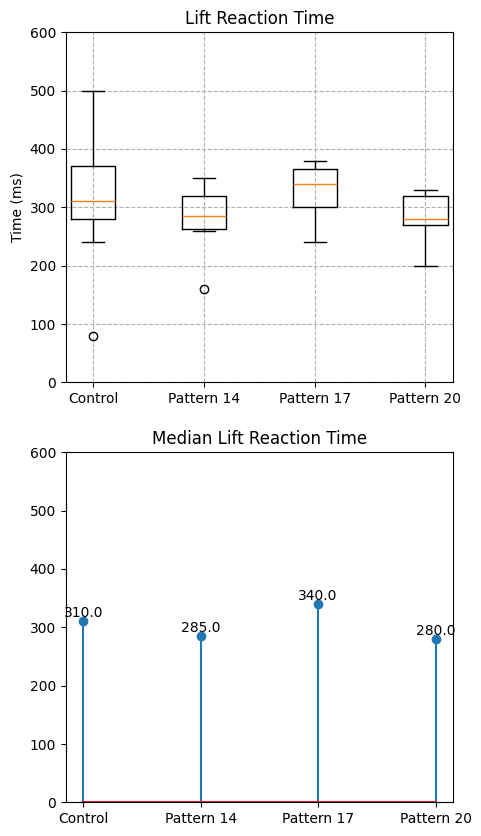

In [8]:
fig, axes = plt.subplots(2, 1, figsize=(5, 10), sharey=True)

axes = axes.flatten()

# Combine data into a list
all_data = [control_lift, p14_lift, p17_lift, p20_lift]

# Define custom x-axis positions for each boxplot
# For example, placing boxplots at x=1, x=3, and x=5
positions = [1, 3, 5, 7]

# Create the boxplots with custom positions
axes[0].boxplot(all_data, positions=positions, widths=0.8)

# Set x-axis labels (optional, but good practice for clarity)
axes[0].set_xticks(positions, ['Control', 'Pattern 14', 'Pattern 17', "Pattern 20"])

# Add labels and title
axes[0].set_ylabel('Time (ms)')
axes[0].set_title('Lift Reaction Time')

axes[0].set_ylim(0, 600)

# Display the plot
axes[0].grid(True, linestyle='--', alpha=1)

y = [sum(control_lift) / len(control_lift),sum(p14_lift) / len(p14_lift),sum(p17_lift) / len(p17_lift), sum(p20_lift) / len(p20_lift) ]
y = [np.median(control_lift), np.median(p14_lift), np.median(p17_lift), np.median(p20_lift)]

axes[1].stem(positions , y) 
# axes[1].stem(3, sum(p14_lift) / len(p14_lift))
# axes[1].stem(5, sum(p17_lift) / len(p17_lift))
# axes[1].stem(7, sum(p20_lift) / len(p20_lift))

for x_pos, y_pos in zip(positions, y):
    # Adjust y_offset to position the text above the marker
    y_offset = 2
    # Add text using ax.text()
    axes[1].text(
        x_pos, y_pos + y_offset, 
        f'{round(y_pos, 2)}', 
        ha='center', va='bottom'
    )

axes[1].set_xticks(positions, ['Control', 'Pattern 14', 'Pattern 17', "Pattern 20"])
axes[1].set_title("Median Lift Reaction Time")
#axes[1].set_ylabel("Time (ms)")

plt.show()

# rb50/20250126

In [9]:
f = h5py.File("/home/clewis/wasabi/reaganbullins2/ProjectionProject/rb50/20250126/MAT_FILES/rb50_20250126_datastruct_pt3.mat", 'r')
data = f['data']
print(data.keys())

<KeysViewHDF5 ['aligned_cue_rec_time', 'aligned_laser_rec_time', 'any', 'chan_spk', 'cue', 'cue_rec_time', 'cue_trial_time', 'depth_spk', 'field_id', 'field_size', 'full_field', 'grab', 'grab_ms', 'i_su_orig', 'laser', 'laser_rec_time', 'laser_trial_time', 'lift', 'lift_ms', 'lift_rec_time', 'mouth', 'mouth_ms', 'no_success', 'pattern_fill', 'pattern_id', 'pattern_xy', 'plift', 'plift_ms', 'single', 'spikes_raw_cue', 'spikes_raw_cue_extended', 'spikes_raw_laser', 'spikes_raw_lift', 'totTime', 'trial_start']>


In [10]:
stim_idxs = np.where(data["pattern_id"][:] > 2)[1]
control_idxs = np.where(data["pattern_id"][:] == 0)[1]
single_reach_idxs = np.where(data["single"][:, 0] == 1)
stim_idxs = np.concatenate([stim_idxs, control_idxs])
stim_idxs

array([ 16,  18,  20,  22,  23,  26,  29,  30,  32,  34,  35,  37,  40,
        43,  44,  46,  47,  49,  53,  55,  56,  59,  61,  62,  64,  65,
        68,  71,  72,  73,  78,  79,  80,  83,  84,  85,  88,  91,  92,
        95,  96,  97, 100, 102, 103, 107, 109, 110, 112, 113, 115, 118,
       119, 122, 124, 126, 128, 131, 132, 134, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 160, 161, 162, 163, 164, 165, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182,
       183, 184, 185, 186, 187, 188, 190, 191, 192, 193, 194, 195, 196,
       197, 198, 199, 200, 202, 203, 204, 205, 206, 207, 209, 210, 211,
       212, 213, 214, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225,
       226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238,
       239, 240, 241, 242, 243, 244, 245, 246, 248, 249, 250, 251, 252,
       253, 254, 255, 256, 257, 258, 259, 261, 262, 263, 264, 265, 266,
       267, 268, 269, 271, 272, 273, 274, 275, 276, 277, 278, 27

In [11]:
# get no laser trials
behavior_idxs = np.intersect1d(stim_idxs, single_reach_idxs)
behavior_idxs

array([  1,   2,   5,   6,   7,   9,  11,  13,  15,  18,  20,  22,  23,
        26,  27,  29,  30,  33,  34,  35,  37,  39,  40,  45,  46,  47,
        49,  53,  55,  56,  57,  59,  61,  62,  63,  64,  65,  68,  69,
        71,  73,  75,  78,  79,  80,  81,  84,  85,  87,  91,  93,  95,
        99, 102, 105, 107, 109, 110, 111, 112, 115, 117, 118, 119, 122,
       124, 126, 134, 135, 136, 138, 139, 140, 142, 144, 145, 148])

In [12]:
behavior_idxs.shape

(77,)

In [13]:
control_lift = list()
p14_lift = list()
p17_lift = list()
p20_lift = list()

control = list()
p14 = list()
p17 = list()
p20 = list()

In [14]:
for i in behavior_idxs:
    p_id = data["pattern_id"][0][i]

    lift = data["lift_ms"][i, 0]
    grab = data["grab_ms"][i, 0]

    if p_id == 0:
        control_lift.append(lift)
        control.append(grab-lift)
    elif p_id == 14:
        p14_lift.append(lift)
        p14.append(grab-lift)
    elif p_id == 17:
        p17_lift.append(lift)
        p17.append(grab-lift) 
    else:
        p20_lift.append(lift)
        p20.append(grab-lift)

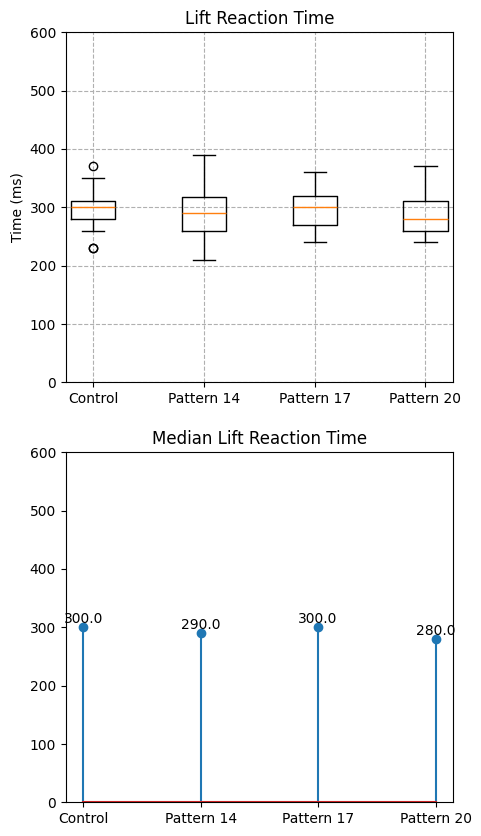

In [15]:
fig, axes = plt.subplots(2, 1, figsize=(5, 10), sharey=True)

axes = axes.flatten()

# Combine data into a list
all_data = [control_lift, p14_lift, p17_lift, p20_lift]

# Define custom x-axis positions for each boxplot
# For example, placing boxplots at x=1, x=3, and x=5
positions = [1, 3, 5, 7]

# Create the boxplots with custom positions
axes[0].boxplot(all_data, positions=positions, widths=0.8)

# Set x-axis labels (optional, but good practice for clarity)
axes[0].set_xticks(positions, ['Control', 'Pattern 14', 'Pattern 17', "Pattern 20"])

# Add labels and title
axes[0].set_ylabel('Time (ms)')
axes[0].set_title('Lift Reaction Time')

# Display the plot
axes[0].grid(True, linestyle='--', alpha=1)

axes[0].set_ylim(0, 600)

y = [sum(control_lift) / len(control_lift),sum(p14_lift) / len(p14_lift),sum(p17_lift) / len(p17_lift), sum(p20_lift) / len(p20_lift) ]
y = [np.median(control_lift), np.median(p14_lift), np.median(p17_lift), np.median(p20_lift)]

axes[1].stem(positions , y) 
# axes[1].stem(3, sum(p14_lift) / len(p14_lift))
# axes[1].stem(5, sum(p17_lift) / len(p17_lift))
# axes[1].stem(7, sum(p20_lift) / len(p20_lift))

for x_pos, y_pos in zip(positions, y):
    # Adjust y_offset to position the text above the marker
    y_offset = 2
    # Add text using ax.text()
    axes[1].text(
        x_pos, y_pos + y_offset, 
        f'{round(y_pos, 2)}', 
        ha='center', va='bottom'
    )

axes[1].set_xticks(positions, ['Control', 'Pattern 14', 'Pattern 17', "Pattern 20"])
axes[1].set_title("Median Lift Reaction Time")
#axes[1].set_ylabel("Time (ms)")

plt.show()

# rb50/20250127

In [16]:
f = h5py.File("/home/clewis/wasabi/reaganbullins2/ProjectionProject/rb50/20250127/MAT_FILES/rb50_20250127_datastruct_pt3.mat", 'r')
data = f['data']
print(data.keys())

<KeysViewHDF5 ['aligned_cue_rec_time', 'aligned_laser_rec_time', 'any', 'cue', 'cue_rec_time', 'cue_trial_time', 'field_id', 'field_size', 'full_field', 'grab', 'grab_ms', 'laser', 'laser_rec_time', 'laser_trial_time', 'lift', 'lift_ms', 'mouth', 'mouth_ms', 'no_success', 'pattern_fill', 'pattern_id', 'pattern_xy', 'single', 'totTime', 'trial_start']>


In [17]:
stim_idxs = np.where(data["pattern_id"][:] > 2)[1]
control_idxs = np.where(data["pattern_id"][:] == 0)[1]
single_reach_idxs = np.where(data["single"][:, 0] == 1)
stim_idxs = np.concatenate([stim_idxs, control_idxs])
stim_idxs

array([ 17,  19,  20,  22,  23,  24,  28,  29,  30,  34,  35,  36,  40,
        43,  44,  46,  49,  50,  53,  54,  56,  60,  61,  62,  65,  66,
        67,  70,  71,  74,  77,  79,  80,  82,  83,  86,  88,  89,  91,
        94,  95,  96, 100, 101, 102, 106, 107, 108, 114, 115, 116, 118,
       119, 120, 124, 127, 128, 131, 132, 133, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 179, 180, 181, 182,
       183, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 196, 197,
       198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210,
       211, 212, 213, 214, 215, 216, 217, 219, 220, 221, 223, 224, 225,
       226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238,
       239, 240, 241, 242, 243, 244, 246, 247, 248, 249, 250, 251, 252,
       253, 254, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266,
       267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 27

In [18]:
# get no laser trials
behavior_idxs = np.intersect1d(stim_idxs, single_reach_idxs)
behavior_idxs

array([  0,   1,   3,   4,   5,   6,   7,   8,   9,  10,  12,  14,  15,
        17,  19,  20,  21,  23,  24,  30,  33,  36,  39,  40,  43,  44,
        45,  46,  49,  50,  51,  53,  54,  60,  61,  62,  63,  67,  69,
        70,  71,  74,  77,  81,  82,  88,  89,  91, 105, 107, 116, 117,
       137, 139, 145, 148])

In [19]:
behavior_idxs.shape

(56,)

In [20]:
control_lift = list()
p14_lift = list()
p17_lift = list()
p20_lift = list()

control = list()
p14 = list()
p17 = list()
p20 = list()

In [21]:
for i in behavior_idxs:
    p_id = data["pattern_id"][0][i]

    lift = data["lift_ms"][i, 0]
    grab = data["grab_ms"][i, 0]

    if p_id == 0:
        control_lift.append(lift)
        control.append(grab-lift)
    elif p_id == 14:
        p14_lift.append(lift)
        p14.append(grab-lift)
    elif p_id == 17:
        p17_lift.append(lift)
        p17.append(grab-lift) 
    else:
        p20_lift.append(lift)
        p20.append(grab-lift)

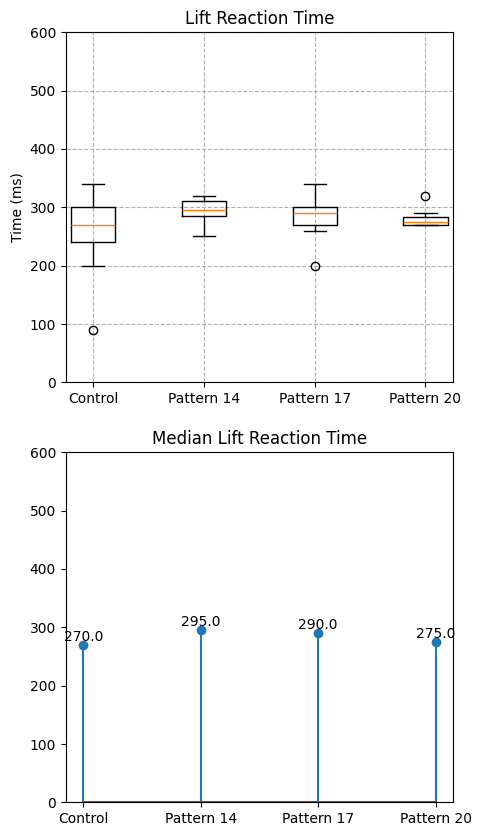

In [22]:
fig, axes = plt.subplots(2, 1, figsize=(5, 10), sharey=True)

axes = axes.flatten()

# Combine data into a list
all_data = [control_lift, p14_lift, p17_lift, p20_lift]

# Define custom x-axis positions for each boxplot
# For example, placing boxplots at x=1, x=3, and x=5
positions = [1, 3, 5, 7]

# Create the boxplots with custom positions
axes[0].boxplot(all_data, positions=positions, widths=0.8)

# Set x-axis labels (optional, but good practice for clarity)
axes[0].set_xticks(positions, ['Control', 'Pattern 14', 'Pattern 17', "Pattern 20"])

# Add labels and title
axes[0].set_ylabel('Time (ms)')
axes[0].set_title('Lift Reaction Time')

# Display the plot
axes[0].grid(True, linestyle='--', alpha=1)

axes[0].set_ylim(0, 600)

y = [sum(control_lift) / len(control_lift),sum(p14_lift) / len(p14_lift),sum(p17_lift) / len(p17_lift), sum(p20_lift) / len(p20_lift) ]
y = [np.median(control_lift), np.median(p14_lift), np.median(p17_lift), np.median(p20_lift)]

axes[1].stem(positions , y) 
# axes[1].stem(3, sum(p14_lift) / len(p14_lift))
# axes[1].stem(5, sum(p17_lift) / len(p17_lift))
# axes[1].stem(7, sum(p20_lift) / len(p20_lift))

for x_pos, y_pos in zip(positions, y):
    # Adjust y_offset to position the text above the marker
    y_offset = 2
    # Add text using ax.text()
    axes[1].text(
        x_pos, y_pos + y_offset, 
        f'{round(y_pos, 2)}', 
        ha='center', va='bottom'
    )

axes[1].set_xticks(positions, ['Control', 'Pattern 14', 'Pattern 17', "Pattern 20"])
axes[1].set_title("Median Lift Reaction Time")
#axes[1].set_ylabel("Time (ms)")

plt.show()